In [1]:
# 📦 Базовые библиотеки
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

# 🖼️ Обработка изображений
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ⚙️ Модель
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# 📊 Метрики и оценка
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
!kaggle datasets download -d oddrationale/mnist-in-csv

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -q mnist-in-csv.zip

replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
df_train = pd.read_csv("mnist_train.csv")

print(df_train.shape)
df_train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test = pd.read_csv("mnist_test.csv")

print(df_test.shape)
df_test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


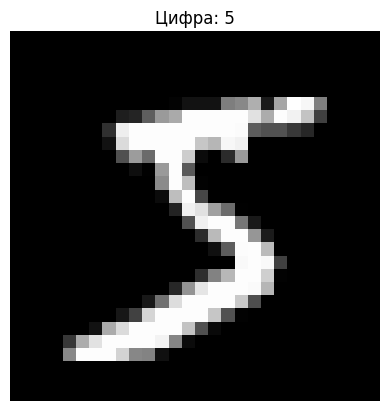

In [6]:
image_array = df_train.iloc[0, 1:].values.reshape(28, 28)

plt.imshow(image_array, cmap="gray")
plt.title(f"Цифра: {df_train.iloc[0, 0]}")
plt.axis("off")
plt.show()

In [7]:
df_train.isnull().sum().sum()

np.int64(0)

In [8]:
df_train.dtypes.value_counts()

int64    785
Name: count, dtype: int64

In [9]:
print("min pixel:", df_train.iloc[:,1:].values.min())
print("max pixel:", df_train.iloc[:,1:].values.max())

min pixel: 0
max pixel: 255


In [10]:
arr = df_train["label"].unique()
arr = np.sort(arr)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [11]:
df_train.duplicated().sum()

np.int64(0)

In [12]:
X_train = df_train.drop("label", axis=1).values
y_train = df_train["label"].values

X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8557 - loss: 0.4582 - val_accuracy: 0.9843 - val_loss: 0.0548
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9788 - loss: 0.0686 - val_accuracy: 0.9880 - val_loss: 0.0391
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9864 - loss: 0.0477 - val_accuracy: 0.9903 - val_loss: 0.0345
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9879 - loss: 0.0368 - val_accuracy: 0.9900 - val_loss: 0.0339
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9923 - val_loss: 0.0291
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9930 - val_loss: 0.0289
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accu

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовой выборке: {test_acc:.4f}")
print(f"Потери на тестовой выборке: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0325
Точность на тестовой выборке: 0.9923
Потери на тестовой выборке: 0.0250
